In [1]:
import os
os.chdir('/home/tapas/Downloads/Brainwaves/')

In [2]:
os.listdir(".")

['braiwaves.R',
 'test.csv',
 'train.csv',
 'sample_submission.csv',
 'all_data.csv']

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
train = pd.read_csv('train.csv')

In [130]:
y = train['return']

In [131]:
train_len = len(train)

In [132]:
test = pd.read_csv('test.csv')

In [133]:
test.head(5)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN,NaN


In [134]:
protfolio_ID = test['portfolio_id'] 

In [135]:
all_data = pd.concat((train.loc[:,'office_id':'status'],
                      test.loc[:,'office_id':'status']))

In [136]:
all_data.head(5)

,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN
1,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN
2,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN
3,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN
4,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN


In [137]:
all_data.tail(5)

,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
4796,OFF00001002,C,20160621,55000000.0,M,-0.00349,CHF,-0.556873,5.499519e+07,20160621,True,20160628,E,False,True
4797,OFF00001002,C,20160621,138809000.0,M,-0.00349,CHF,-0.556873,1.387969e+08,20160621,True,20160628,E,False,True
4798,OFF00001002,B,20160622,28732000.0,N,-0.00349,GBP,0.960652,2.872930e+07,20160622,True,20160629,C,False,True
4799,OFF00001002,C,20160623,34419000.0,M,-0.00349,CHF,-0.556873,3.441599e+07,20160623,True,20160630,E,False,True
4800,OFF00001002,C,20160628,53713000.0,M,-0.00349,CHF,-0.556873,5.370778e+07,20160628,True,20160705,E,False,True


In [138]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (14167, 15)


# Deal with Missing Values

In [139]:
all_data["bought"] = all_data["bought"].transform(lambda x: x.fillna(x.median()))                                       

In [140]:
all_data["sold"] = all_data["sold"].transform(lambda x: x.fillna(x.median())) 

In [141]:
#all_data['bought'].fillna(0, inplace=True)
#all_data['sold'].fillna(0, inplace=True)

In [142]:
na_totals = all_data.isnull().sum().sort_values(ascending=False)
na_totals[na_totals>0]

hedge_value       8552
indicator_code    8550
status            4541
libor_rate         739
dtype: int64

In [143]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
hedge_value,60.365638
indicator_code,60.351521
status,32.053363
libor_rate,5.216348


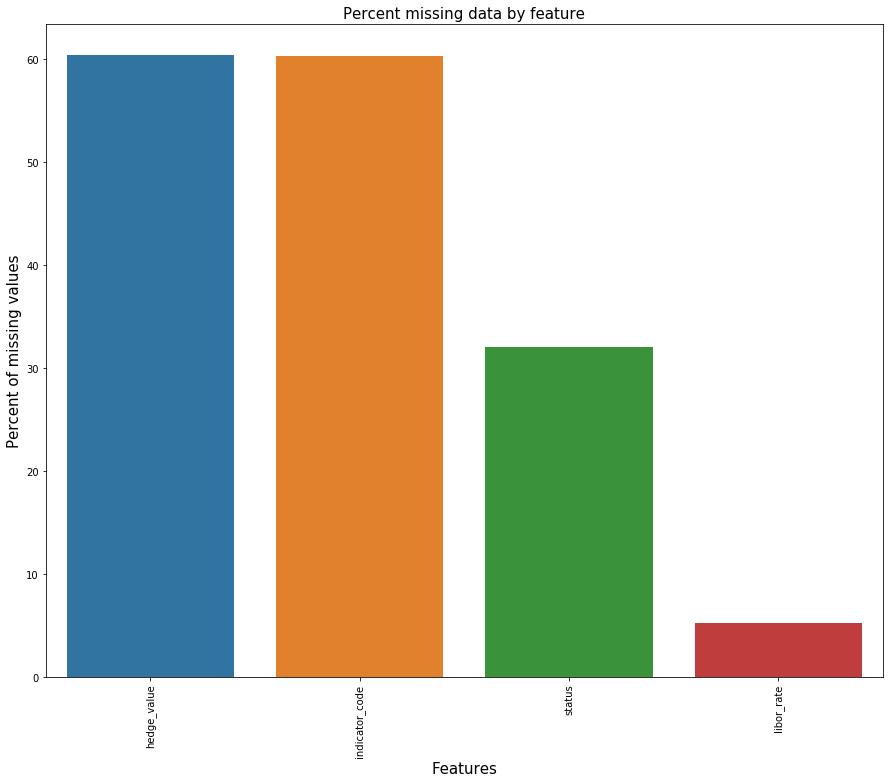

In [144]:
%matplotlib inline
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [145]:
all_data["hedge_value"] = all_data["hedge_value"].fillna("None")

In [146]:
all_data["indicator_code"] = all_data["indicator_code"].fillna("None")

In [147]:
#all_data["desk_id"] = all_data["desk_id"].fillna("None")

In [148]:
all_data["status"] = all_data["status"].fillna("miss")

In [149]:
#all_data['status'] = all_data['status'].fillna(all_data['status'].mode()[0])

In [150]:
all_data["libor_rate"] = all_data["libor_rate"].transform(lambda x: x.fillna(x.median()))

In [151]:
all_data.isnull().sum()

office_id         0
pf_category       0
start_date        0
sold              0
country_code      0
euribor_rate      0
currency          0
libor_rate        0
bought            0
creation_date     0
indicator_code    0
sell_date         0
type              0
hedge_value       0
status            0
dtype: int64

# Feature Analysis

In [152]:
all_data.head(5)

,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,None,20040812,B,None,miss
1,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,None,20040812,C,None,miss
2,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,None,20040817,A,None,miss
3,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,None,20040713,A,None,miss
4,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,None,20040713,B,None,miss


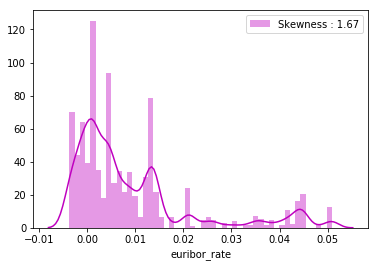

In [153]:
# Explore Fare distribution 
g = sns.distplot(all_data["euribor_rate"], color="m", label="Skewness : %.2f"%(all_data["euribor_rate"].skew()))
g.legend(loc="best")

In [154]:
all_data["euribor_rate"] = all_data["euribor_rate"].map(lambda i: np.log(i) if i > 0 else 0)

In [155]:
all_data["libor_rate"] = all_data["libor_rate"].map(lambda i: np.log(i) if i > 0 else 0)

In [156]:
all_data["sold"] = all_data["sold"].map(lambda i: np.log(i) if i > 0 else 0)

In [157]:
all_data["bought"] = all_data["bought"].map(lambda i: np.log(i) if i > 0 else 0)

In [158]:
all_data["office_id"] = all_data["office_id"].astype("category",categories=['OFF00001002','OFF00001001'],ordered=True).cat.codes

In [159]:
all_data["indicator_code"] = all_data["indicator_code"].astype("category",categories=['TRUE','None'],ordered=True).cat.codes

In [160]:
all_data["country_code"] = all_data["country_code"].astype("category",categories=["M","N","T","U","Z"],ordered=True).cat.codes

In [161]:
all_data["currency"] = all_data["currency"].astype("category",categories=["CHF","EUR","GBP","JPY","USD"],ordered=True).cat.codes

In [162]:
all_data["type"] = all_data["type"].astype("category",categories=["A","B","C","D","E","F","G","H"],ordered=True).cat.codes

In [163]:
all_data["hedge_value"] = all_data["hedge_value"].astype("category",categories=["FALSE","TRUE","None"],ordered=True).cat.codes

In [164]:
all_data["status"] = all_data["status"].astype("category",categories=["TRUE","None"],ordered=True).cat.codes

In [177]:
all_data["pf_category"] = all_data["pf_category"].astype("category",categories=["A","B","C","D","E"],ordered=True).cat.codes

In [168]:
all_data = pd.get_dummies(all_data,columns=['status','hedge_value','type','country_code','indicator_code','office_id'],drop_first=True)

In [178]:
all_data.head(5)

,pf_category,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,sell_date,hedge_value_2,...,type_4,type_5,type_6,type_7,country_code_1,country_code_2,country_code_3,country_code_4,indicator_code_1,office_id_1
0,1,20040720,18.515991,-3.875691,4,0.846819,18.514259,20040720,20040812,1,...,0,0,0,0,0,1,0,0,1,0
1,0,20040709,18.989800,-3.875691,2,1.661958,18.986042,20040723,20040812,1,...,0,0,0,0,1,0,0,0,1,1
2,0,20040723,17.849291,-3.875691,4,0.846819,17.847617,20040723,20040817,1,...,0,0,0,0,0,1,0,0,1,1
3,0,20040609,18.920322,-3.875691,4,0.846819,18.918475,20040723,20040713,1,...,0,0,0,0,0,1,0,0,1,1
4,1,20040609,18.762851,-3.875691,4,0.846819,18.761004,20040723,20040713,1,...,0,0,0,0,0,1,0,0,1,0


In [201]:
X_train = all_data[:train_len]
X_test = all_data[train_len:]

# Model

In [180]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [181]:
X_train

,pf_category,start_date,sold,euribor_rate,currency,libor_rate,bought,creation_date,sell_date,hedge_value_2,...,type_4,type_5,type_6,type_7,country_code_1,country_code_2,country_code_3,country_code_4,indicator_code_1,office_id_1
0,1,20040720,18.515991,-3.875691,4,0.846819,18.514259,20040720,20040812,1,...,0,0,0,0,0,1,0,0,1,0
1,0,20040709,18.989800,-3.875691,2,1.661958,18.986042,20040723,20040812,1,...,0,0,0,0,1,0,0,0,1,1
2,0,20040723,17.849291,-3.875691,4,0.846819,17.847617,20040723,20040817,1,...,0,0,0,0,0,1,0,0,1,1
3,0,20040609,18.920322,-3.875691,4,0.846819,18.918475,20040723,20040713,1,...,0,0,0,0,0,1,0,0,1,1
4,1,20040609,18.762851,-3.875691,4,0.846819,18.761004,20040723,20040713,1,...,0,0,0,0,0,1,0,0,1,0
5,0,20040707,17.702031,-3.875691,4,0.846819,17.700188,20040726,20040810,1,...,0,0,0,0,0,1,0,0,1,1
6,0,20040706,17.919698,-3.875691,4,0.846819,17.917853,20040726,20040809,1,...,0,0,0,0,0,1,0,0,1,1
7,1,20040706,18.714842,-3.875691,4,0.846819,18.712997,20040726,20040809,1,...,0,0,0,0,0,1,0,0,1,0
8,0,20040419,18.233495,-3.875691,4,0.846819,18.228383,20040726,20040720,1,...,0,0,0,0,0,1,0,0,1,1
9,0,20040414,19.174340,-3.875691,4,0.846819,19.169329,20040727,20040713,1,...,0,0,0,0,0,1,0,0,1,1


In [182]:
model_ridge = Ridge()

In [183]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

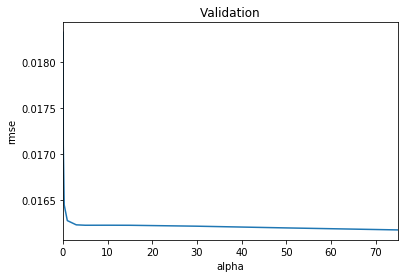

In [184]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [185]:
cv_ridge.min()

0.016174805777428317

In [190]:
model_lasso = LassoCV(alphas = [100,50,10,5,1]).fit(X_train, y)

In [191]:
rmse_cv(model_lasso).mean()

0.018897754199933978

In [192]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [193]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 21 variables


In [194]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

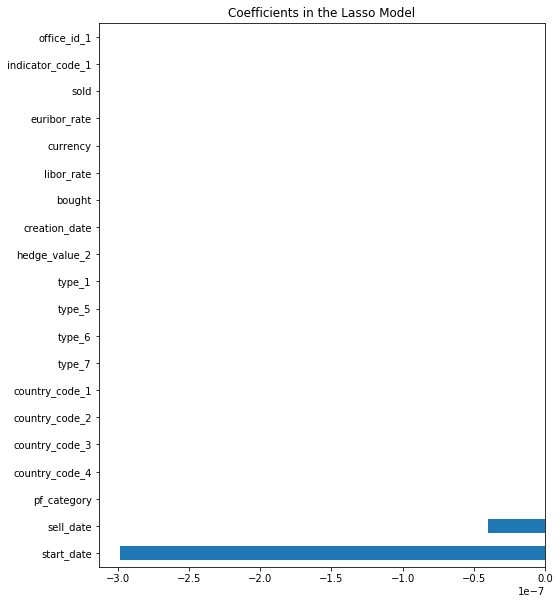

In [196]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

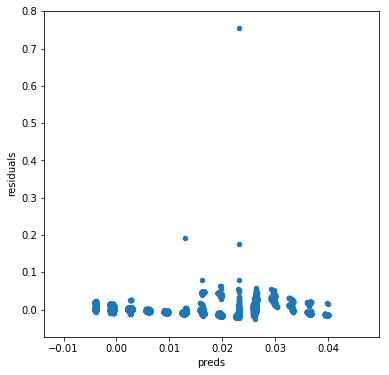

In [198]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [199]:
import xgboost as xgb

/home/tapas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [202]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

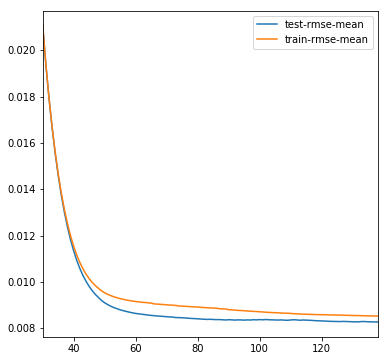

In [203]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [204]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [205]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

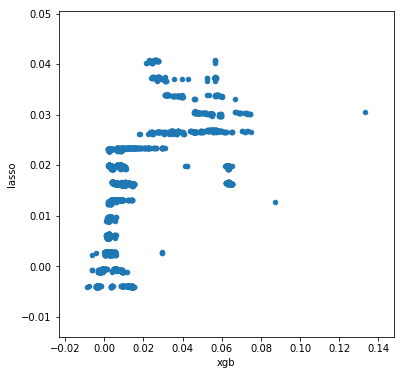

In [206]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [211]:
preds = xgb_preds

In [212]:
solution = pd.DataFrame({"portfolio_id":protfolio_ID, "return":preds})
solution.to_csv("ridge_solt.csv", index = False)